安裝中文字體

In [17]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-10-17 15:06:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-17 15:06:04--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  54.3MB/s    in 0.4s    

2024-10-17 15:06:11 (54.3 MB/s) 

繪圖: 統計任務難度的分布以及年級與任務領域分佈

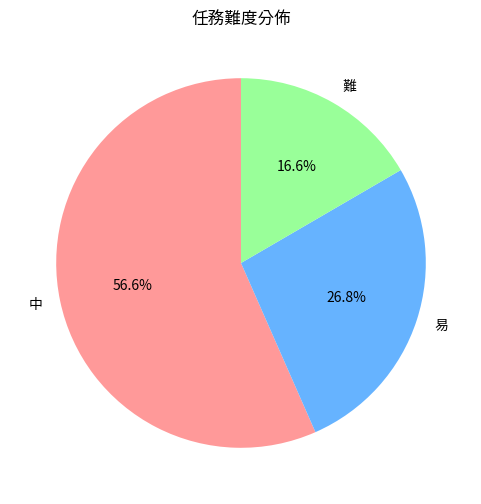

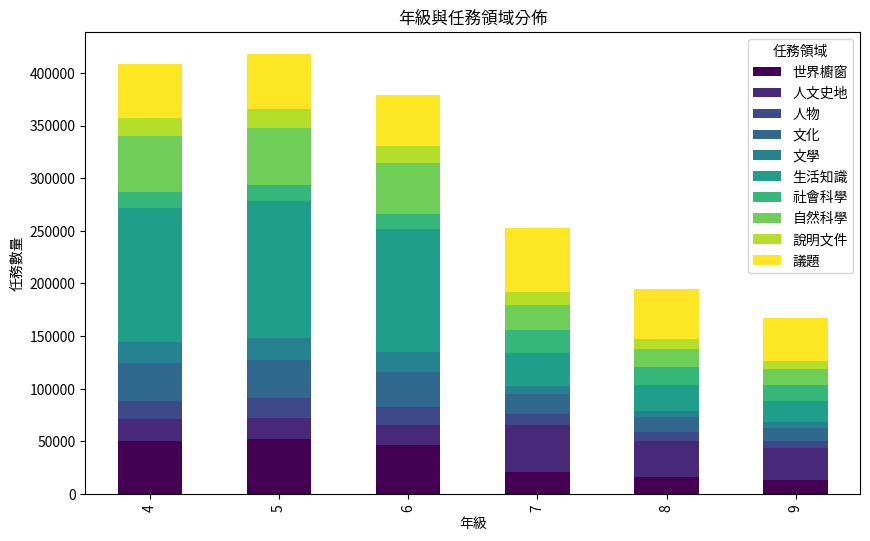

每個年級未完成任務的比例 (%)：
grade
5    20.801371
4    20.472042
6    19.828367
7    16.006383
8    12.381089
9    10.510748
Name: proportion, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager


df = pd.read_csv("A_stat_data_112.csv")

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

def mission_difficulty_stats(df):
    difficulty_counts = df['mission_difficulty'].value_counts()

    # 繪製圓餅圖
    plt.figure(figsize=(6, 6))
    difficulty_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
    plt.title('任務難度分佈')
    plt.ylabel('')  # 隱藏Y軸標籤
    plt.show()

# 2. 功能 2：年級與任務領域分佈
def grade_mission_field_distribution(df):
    # 計算每個年級在不同領域中的任務數量
    field_counts = df.groupby(['grade', 'mission_field']).size().unstack(fill_value=0)

    # 繪製條形圖
    field_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('年級與任務領域分佈')
    plt.xlabel('年級')
    plt.ylabel('任務數量')
    plt.legend(title='任務領域')
    plt.show()

# 3. 功能 3：未完成任務分析
def incomplete_mission_analysis(df):
    incomplete_missions = df[df['is_completed'] == 0]

    # 計算每個年級的未完成任務比例
    incomplete_rate = incomplete_missions['grade'].value_counts(normalize=True) * 100

    # 顯示結果
    print("每個年級未完成任務的比例 (%)：")
    print(incomplete_rate)

# 執行功能 1：任務難度統計
mission_difficulty_stats(df)

# 執行功能 2：年級與任務領域分佈
grade_mission_field_distribution(df)

# 執行功能 3：未完成任務分析
incomplete_mission_analysis(df)

計算不同難度的correct rate，遇到nan時忽略

In [12]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

difficulty_correct_rate = {}

for index, row in df.iterrows():
    difficulty = row['mission_difficulty']
    correct_rate = row['correct_rate']

    # 檢查是否有 NaN 值，若有則跳過
    if pd.isna(difficulty) or pd.isna(correct_rate):
        continue  # 忽略這些行

    # 如果該難度已經存在於字典中
    if difficulty in difficulty_correct_rate:
        # 累加 correct_rate 和出現次數
        difficulty_correct_rate[difficulty]['total_correct_rate'] += correct_rate
        difficulty_correct_rate[difficulty]['count'] += 1
    else:
        # 如果不存在，初始化該難度的統計
        difficulty_correct_rate[difficulty] = {
            'total_correct_rate': correct_rate,
            'count': 1
        }

# 計算每個難度的平均 correct_rate
for difficulty, values in difficulty_correct_rate.items():
    average_correct_rate = values['total_correct_rate'] / values['count']
    print(f"{difficulty} 的平均 correct_rate: {average_correct_rate:.2f}")


易 的平均 correct_rate: 0.44
中 的平均 correct_rate: 0.42
難 的平均 correct_rate: 0.40


以下程式為課堂練習

In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

display(df.head())
display(df.tail(3))
print(df.index)
print(df.columns)

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
1909956,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3633088233029289359,703618323232836566
1909957,8,4月特別任務－【SDGs 議題】（中階）,NaN,NaN,NaN,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3198336096824660439,-371611706378504607
1909958,9,4月特別任務－【SDGs 議題】（中階）,NaN,NaN,NaN,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,8248998181802054321,-371611706378504607


RangeIndex(start=0, stop=1909959, step=1)
Index(['grade', 'mission_name', 'mission_difficulty', 'mission_field',
       'mission_type', 'mission_semester_year', 'mission_semester',
       'mission_datetime_utc8', 'mission_status', 'is_completed',
       'completed_at_utc8', 'correct_rate', 'answer_duration_sec',
       'mission_answer_count', 'content_indicator_correct_rate',
       'comprehensive_indicator_correct_rate',
       'explanation_indicator_correct_rate',
       'extraction_indicator_correct_rate', 'form_indicator_correct_rate',
       'first_correct_rate', 'user_id', 'mission_id'],
      dtype='object')


In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

df.describe()

,grade,mission_semester_year,is_completed,correct_rate,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
count,1.909959e+06,1909959.0,1.909959e+06,454877.000000,453620.000000,1.909959e+06,106038.000000,448856.000000,392142.000000,414331.000000,78801.000000,473392.000000,1.909959e+06,1.909959e+06
mean,5.949924e+00,112.0,2.381606e-01,0.412165,147.150187,7.111859e-01,0.377652,0.414174,0.385411,0.438963,0.375179,0.451405,-5.836128e+15,-1.368036e+17
std,1.586873e+00,0.0,4.259580e-01,0.317815,328.610611,1.676427e+00,0.475326,0.401837,0.446032,0.455068,0.482087,0.316127,5.341203e+18,5.285432e+18
min,4.000000e+00,112.0,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223321e+18,-9.144214e+18
25%,5.000000e+00,112.0,0.000000e+00,0.200000,10.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,-4.611004e+18,-4.782878e+18
50%,6.000000e+00,112.0,0.000000e+00,0.400000,37.000000,0.000000e+00,0.000000,0.333333,0.000000,0.333333,0.000000,0.400000,6.201597e+16,-2.337655e+17
75%,7.000000e+00,112.0,0.000000e+00,0.600000,176.000000,1.000000e+00,1.000000,0.857143,1.000000,1.000000,1.000000,0.600000,4.565403e+18,3.909487e+18
max,9.000000e+00,112.0,1.000000e+00,1.000000,3600.000000,2.100000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.218903e+18,9.217426e+18


In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

df.sort_index(axis = 1, ascending = False)
df.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

df.sort_index(axis = 1, ascending = False)
display(df["mission_name"])
display(df[0:3])

,mission_name
0,05/06 虎姑婆【多元文化教育－傳說故事】（初階）
1,05/06 二郎【多元文化教育－傳說故事】（初階）
2,05/09 蚩尤【多元文化教育－傳說故事】（初階）
3,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）
4,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）
...,...
1909954,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）
1909955,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）
1909956,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）
1909957,4月特別任務－【SDGs 議題】（中階）


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405


In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

a = 'grade'
df.duplicated(subset=[a]).sum()

1909953

In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

a = 'grade'
df.duplicated(subset=[a]).sum()

duplication = df[df.duplicated(a)]
display(duplication[a])


a = 'user_id'
df3 = df.drop_duplicates(a)
df3

,grade
1,5
3,5
4,6
5,6
6,5
...,...
1909954,8
1909955,8
1909956,8
1909957,8


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024467,4,01/15 運動中心傳單【生命教育－運動鍛鍊】(初階),中,說明文件,非連續,112,112-1,Mon Jan 15 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-4922170724652889514,5050648008685985453
1024468,4,01/15 關於跳躍力的祕密【生命教育－運動鍛鍊】(初階),易,生活知識,連續,112,112-1,Mon Jan 15 08:00:00 UTC 2024,進行任務中,0,...,NaN,2,NaN,NaN,NaN,NaN,NaN,0.6,-2434296012334180512,4447409378859886590
1140603,7,01/15 VR把你放進別人的鞋裡？！【科技教育－現代科技】(中階),中,議題,連續,112,112-1,Mon Jan 15 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-2023147156830779559,6244252628695738548
1167646,4,06/27 紙【能源教育－環境保育】（初階）,易,生活知識,連續＋圖表,112,112-2,Thu Jun 27 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3850367010299798424,6001971291541386821


In [ ]:
import pandas as pd
import numpy as np
p = 'one two one two one two'.split()
p1 = 'a1 a2 a3 a4 a5 a6'.split()
df = pd.DataFrame(
    {
        "A": p,
        "B": p1,
        "C": np.random.randn(6),
        "D": np.random.randn(6),
    }
)

display(df)

display(df.groupby("A").sum())
display(df.groupby(["A", "B"]).sum())

,A,B,C,D
0,one,a1,-0.311607,0.322010
1,two,a2,-1.396309,-0.123046
2,one,a3,0.394398,1.143294
3,two,a4,1.930444,-0.157379
4,one,a5,0.258020,0.930636
5,two,a6,0.152262,-0.691533


,B,C,D
A,,,
one,a1a3a5,0.340811,2.395941
two,a2a4a6,0.686397,-0.971959


C         D
A   B                     
one a1 -0.311607  0.322010
    a3  0.394398  1.143294
    a5  0.258020  0.930636
two a2 -1.396309 -0.123046
    a4  1.930444 -0.157379
    a6  0.152262 -0.691533

In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

a = df.columns
pp2 = []
for j in a:
  try:
    print(df[j].groupby(df[j]).count())
    pp2.append(df[j].groupby(df[j]).count())
  except:
    print("KeyError")

grade
4    428520
5    438802
6    397674
7    265140
8    204410
9    175413
Name: grade, dtype: int64
mission_name
01/01 我們是用戶還是商品？社群媒體之戰【資訊教育－社群媒體】(中階)     4043
01/01 數據風暴【資訊教育－社群媒體】(中階)                 4043
01/01 表情符號【資訊教育－資訊解讀】(初階)                 7608
01/01 觀影資訊【資訊教育－資訊解讀】(初階)                 7608
01/04 你可能已經犯罪了！【資訊教育－數位倫理】(中階)            4046
                                         ...  
5月特別任務－【SDGs 議題】（初階）                      7318
6月特別任務－【SDGs 議題】（中階）                      3711
6月特別任務－【SDGs 議題】（初階）                      7324
9月特別任務－【SDGs 議題】（中階）                     11760
9月特別任務－【SDGs 議題】（初階）                     22647
Name: mission_name, Length: 335, dtype: int64
mission_difficulty
中    1030200
易     487585
難     302401
Name: mission_difficulty, dtype: int64
mission_field
世界櫥窗    198882
人文史地    169453
人物       79521
文化      150953
文學       78925
生活知識    449538
社會科學     98284
自然科學    212554
說明文件     81762
議題      300314
Name: mission_field, dtype: int64
mission_type
連續       104

In [ ]:
import pandas as pd
df = pd.read_csv("A_stat_data_112.csv")

df.dropna()
df.fillna(5)
df.interpolate()

<ipython-input-23-9a8a2e3a2929>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909954,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,102.0,0,0.0,0.0,0.5,0.0,1.0,0.2,5090607127449525741,703618323232836566
1909955,8,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,102.0,0,0.0,0.0,0.5,0.0,1.0,0.2,1122720388891184818,8809938774431070893
1909956,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,102.0,0,0.0,0.0,0.5,0.0,1.0,0.2,-3633088233029289359,703618323232836566
1909957,8,4月特別任務－【SDGs 議題】（中階）,NaN,NaN,NaN,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,102.0,0,0.0,0.0,0.5,0.0,1.0,0.2,-3198336096824660439,-371611706378504607


In [ ]:
df1 = pd.DataFrame(
{
"A": ["A0", "A1", "A2", "A3"],"B": ["B0", "B1", "B2", "B3"], "C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"],
},
index=[0, 1, 2, 3],
)
df2 = pd.DataFrame(
{
"A": ["A4", "A5", "A6", "A7"], "B": ["B4", "B5", "B6", "B7"], "C": ["C4", "C5", "C6", "C7"], "D": ["D4", "D5", "D6", "D7"],
},
index=[4, 5, 6, 7],
)
df3 = pd.DataFrame(
{
"A": ["A8", "A9", "A10", "A11"], "B": ["B8", "B9", "B10", "B11"], "C": ["C8", "C9", "C10", "C11"], "D": ["D8", "D9", "D10", "D11"],
},
index=[8, 9, 10, 11],)

display(df1)
display(df2)
display(df3)

frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9
